In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/Users/abduroshyd/Downloads/cars2018.csv')

In [3]:
def tozala(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype=='object':
                df[col].fillna(df[col].mode()[0],inplace=True)
            else:
                df[col].fillna(df[col].mean(),inplace=True)
    return df

In [4]:
tozala(df)

,model,model_index,displacement,cylinders,gears,transmission,mpg,aspiration,lockup_torque_converter,drive,max_ethanol,recommended_fuel,intake_valves_per_cyl,exhaust_valves_per_cyl,fuel_injection
0,Acura NSX,57,3.5,6,9,Manual,21,Turbocharged/Supercharged,Y,All Wheel Drive,10,Premium Unleaded Required,2,2,Direct ignition
1,ALFA ROMEO 4C,410,1.8,4,6,Manual,28,Turbocharged/Supercharged,Y,"2-Wheel Drive, Rear",10,Premium Unleaded Required,2,2,Direct ignition
2,Audi R8 AWD,65,5.2,10,7,Manual,17,Naturally Aspirated,Y,All Wheel Drive,15,Premium Unleaded Recommended,2,2,Direct ignition
3,Audi R8 RWD,71,5.2,10,7,Manual,18,Naturally Aspirated,Y,"2-Wheel Drive, Rear",15,Premium Unleaded Recommended,2,2,Direct ignition
4,Audi R8 Spyder AWD,66,5.2,10,7,Manual,17,Naturally Aspirated,Y,All Wheel Drive,15,Premium Unleaded Recommended,2,2,Direct ignition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,TOYOTA LAND CRUISER WAGON 4WD,86,5.7,8,8,Automatic,15,Naturally Aspirated,Y,4-Wheel Drive,15,Regular Unleaded Recommended,2,2,Multipoint/sequential ignition
1140,TOYOTA SEQUOIA 4WD,37,5.7,8,6,Automatic,14,Naturally Aspirated,Y,4-Wheel Drive,15,Regular Unleaded Recommended,2,2,Multipoint/sequential ignition
1141,TOYOTA SEQUOIA 4WD FFV,33,5.7,8,6,Automatic,14,Naturally Aspirated,Y,4-Wheel Drive,85,Regular Unleaded Recommended,2,2,Multipoint/sequential ignition
1142,"Volvo Cars of North America, LLC XC90 AWD",53,2.0,4,8,Automatic,24,Turbocharged/Supercharged,Y,All Wheel Drive,10,Premium Unleaded Required,2,2,Direct ignition


In [5]:
import matplotlib.pyplot as plt

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   model                    1144 non-null   object 
 1   model_index              1144 non-null   int64  
 2   displacement             1144 non-null   float64
 3   cylinders                1144 non-null   int64  
 4   gears                    1144 non-null   int64  
 5   transmission             1144 non-null   object 
 6   mpg                      1144 non-null   int64  
 7   aspiration               1144 non-null   object 
 8   lockup_torque_converter  1144 non-null   object 
 9   drive                    1144 non-null   object 
 10  max_ethanol              1144 non-null   int64  
 11  recommended_fuel         1144 non-null   object 
 12  intake_valves_per_cyl    1144 non-null   int64  
 13  exhaust_valves_per_cyl   1144 non-null   int64  
 14  fuel_injection          

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encoding(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].nunique() <= 5:
                dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
                df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
            else:
                encoder = LabelEncoder()
                df[col] = encoder.fit_transform(df[col])
    return df

In [8]:
encoding(df)

,model,model_index,displacement,cylinders,gears,mpg,max_ethanol,intake_valves_per_cyl,exhaust_valves_per_cyl,transmission_Automatic,...,lockup_torque_converter_Y,"drive_2-Wheel Drive, Front","drive_2-Wheel Drive, Rear",drive_4-Wheel Drive,drive_All Wheel Drive,recommended_fuel_Premium Unleaded Recommended,recommended_fuel_Premium Unleaded Required,recommended_fuel_Regular Unleaded Recommended,fuel_injection_Direct ignition,fuel_injection_Multipoint/sequential ignition
0,7,57,3.5,6,9,21,10,2,2,0,...,1,0,0,0,1,0,1,0,1,0
1,0,410,1.8,4,6,28,10,2,2,0,...,1,0,1,0,0,0,1,0,1,0
2,34,65,5.2,10,7,17,15,2,2,0,...,1,0,0,0,1,1,0,0,1,0
3,35,71,5.2,10,7,18,15,2,2,0,...,1,0,1,0,0,1,0,0,1,0
4,36,66,5.2,10,7,17,15,2,2,0,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,695,86,5.7,8,8,15,15,2,2,1,...,1,0,0,1,0,0,0,1,0,1
1140,705,37,5.7,8,6,14,15,2,2,1,...,1,0,0,1,0,0,0,1,0,1
1141,706,33,5.7,8,6,14,85,2,2,1,...,1,0,0,1,0,0,0,1,0,1
1142,748,53,2.0,4,8,24,10,2,2,1,...,1,0,0,0,1,0,1,0,1,0


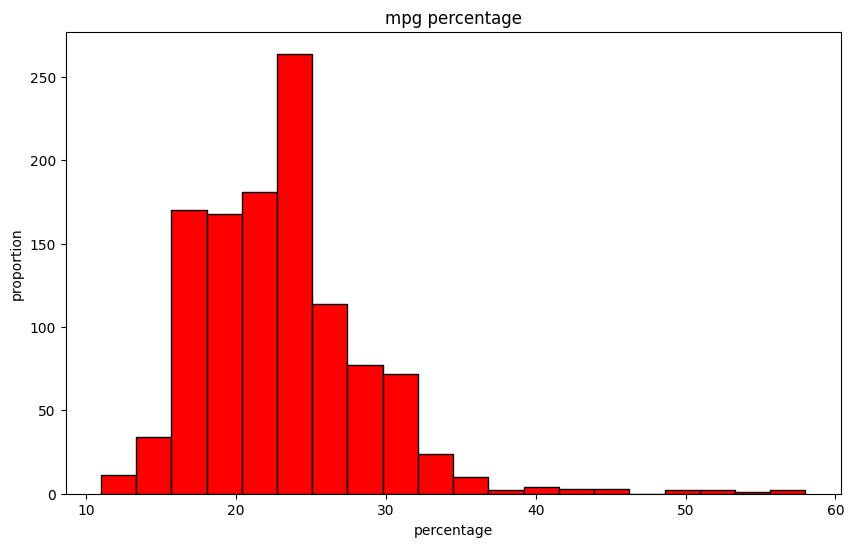

In [9]:
plt.figure(figsize=(10,6))  
plt.hist(df['mpg'],bins=20, color='red',edgecolor='black') 
plt.title('mpg percentage')
plt.xlabel('percentage')
plt.ylabel('proportion')
 
plt.show()

In [10]:
import seaborn as sns

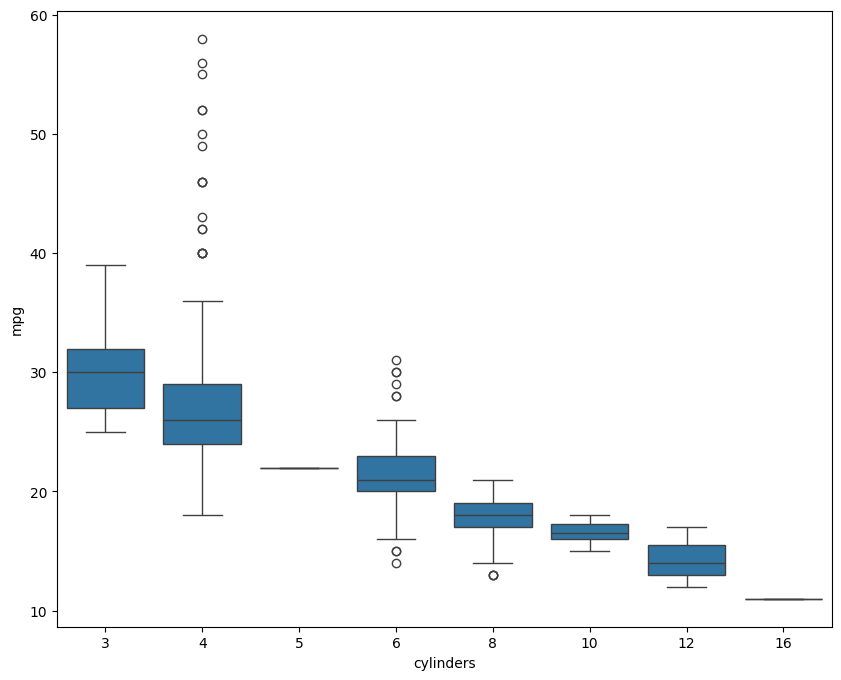

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(x='cylinders', y='mpg',data=df)

plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   model                    1144 non-null   object 
 1   model_index              1144 non-null   int64  
 2   displacement             1144 non-null   float64
 3   cylinders                1144 non-null   int64  
 4   gears                    1144 non-null   int64  
 5   transmission             1144 non-null   object 
 6   mpg                      1144 non-null   int64  
 7   aspiration               1144 non-null   object 
 8   lockup_torque_converter  1144 non-null   object 
 9   drive                    1144 non-null   object 
 10  max_ethanol              1144 non-null   int64  
 11  recommended_fuel         1144 non-null   object 
 12  intake_valves_per_cyl    1144 non-null   int64  
 13  exhaust_valves_per_cyl   1144 non-null   int64  
 14  fuel_injection          

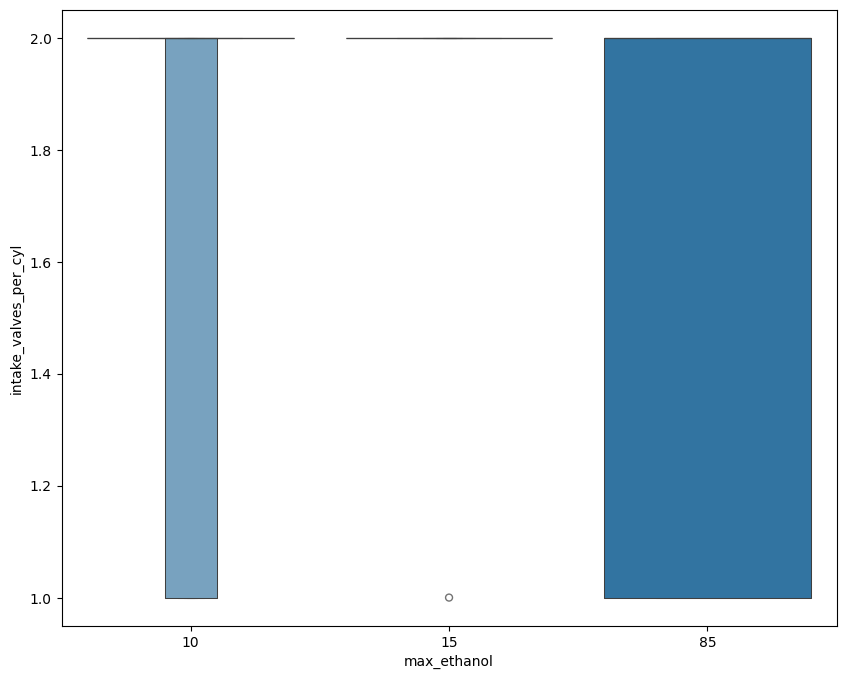

In [21]:
plt.figure(figsize=(10,8))
sns.boxenplot(x='max_ethanol', y='intake_valves_per_cyl',data=df)

plt.show()